# 环绕数的计算公式
![环绕数](https://wikimedia.org/api/rest_v1/media/math/render/svg/b55fd494d8eb2ab390f32504b644987fe6452cff "环绕数") 

## 这里有一个小的技巧是，我们先将两者首尾相连，形成两个闭合的loops，但是，DNA我们认为它是一个无限大的loop，因此，我们是按直线延长处理的，并且我们可以看到这个公式当r2无限大的时候，其实积分是会趋于0的，因此，我们可以做一个截断，从而保证结果的正确性

(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3) (1, 50, 3)
(1, 100, 3)

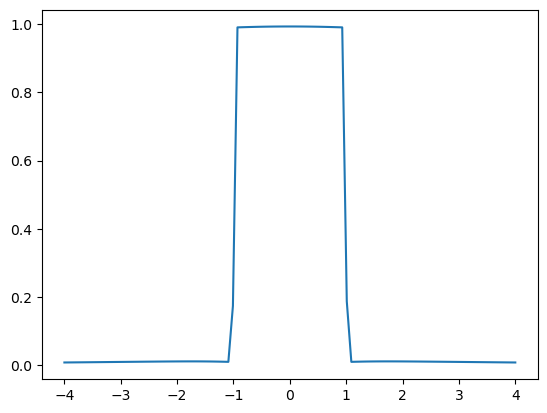

In [16]:
###The test code for the link number calculation.
import numpy as np
import matplotlib.pyplot as plt

def link_num(R1,R2):
    ### r1 is protein and r2 is DNA.
    ### we use 
    dres=4 ### \\AA
    dbase=0.1 ### \\AA
    nfr=len(R1)
    n=[]
    for i in range(nfr):
        r1=R1[i]
        r2=R2[i]
        d_end1=np.linalg.norm(r1[0]-r1[-1])
        n_intp=int(d_end1/dres)
        for j in range(n_intp-1):
            r1=np.concatenate((r1,(r1[-1]+(r1[0]-r1[-1])*(j+1)/n_intp).reshape(1,-1)),axis=0)
        n_intp=10
        for j in range(n_intp):
            r2=np.concatenate(((r2[0]+(r2[0]-r2[-1])*dbase/np.linalg.norm(r2[0]-r2[-1])*(j+1)).reshape(1,-1),r2),axis=0)
        for j in range(n_intp):
            r2=np.concatenate((r2,(r2[-1]+(r2[-1]-r2[0])*dbase/np.linalg.norm(r2[-1]-r2[0])*(j+1)).reshape(1,-1)),axis=0)
        dr1=r1[1:,:]-r1[:-1,:]
        dr2=r2[1:,:]-r2[:-1,:]
        numerator=np.sum((r1[np.newaxis,:,:]-r2[:,np.newaxis,:])[:-1,:-1,:]*np.cross(dr1[np.newaxis,:,:],dr2[:,np.newaxis,:],axis=-1),axis=-1)
        norm=np.linalg.norm((r1[np.newaxis,:,:]-r2[:,np.newaxis,:])[:-1,:-1,:],axis=-1)**3
        n+=[np.abs((1/(4*np.pi))*np.sum(numerator/norm))]
    return n

N=100
d=np.linspace(-4,4,N)
n=[]
for i in range(len(d)):
    t=np.linspace(0,2*np.pi,N)
    r1=np.zeros((1,N,3))
    r1[0,:,0]=np.cos(t)
    r1[0,:,1]=np.sin(t)
    r2=np.zeros((1,int(N/2),3))
    # t=np.linspace(np.pi/2,3*np.pi/2,int(N/2))
    # r2[0,:,1]=np.cos(t)+d[i]
    # r2[0,:,2]=np.sin(t)
    r2[0,:,1]=d[i]
    r2[0,:,2]=np.linspace(-1,1)
    print(r1.shape,r2.shape)
    n+=[link_num(r1,r2)]


plt.plot(d,n)
plt.show()

In [1]:
###The test code for the link number calculation.
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda

def link_num(R1,R2):
    ### r1 is protein and r2 is DNA.
    ### we use 
    dres=4 ### \\AA
    dbase=4 ### \\AA
    nfr=len(R1)
    n=[]
    for i in range(nfr):
        r1=R1[i]
        r2=R2[i]
        d_end1=np.linalg.norm(r1[0]-r1[-1])
        n_intp=int(d_end1/dres)
        for j in range(n_intp-1):
            r1=np.concatenate((r1,(r1[-1]+(r1[0]-r1[-1])*(j+1)/n_intp).reshape(1,-1)),axis=0)
        n_intp=10
        for j in range(n_intp):
            r2=np.concatenate(((r2[0]+(r2[0]-r2[-1])*dbase/np.linalg.norm(r2[0]-r2[-1])*(j+1)).reshape(1,-1),r2),axis=0)
        for j in range(n_intp):
            r2=np.concatenate((r2,(r2[-1]+(r2[-1]-r2[0])*dbase/np.linalg.norm(r2[-1]-r2[0])*(j+1)).reshape(1,-1)),axis=0)
        dr1=r1[1:,:]-r1[:-1,:]
        dr2=r2[1:,:]-r2[:-1,:]
        numerator=np.sum((r1[np.newaxis,:,:]-r2[:,np.newaxis,:])[:-1,:-1,:]*np.cross(dr1[np.newaxis,:,:],dr2[:,np.newaxis,:],axis=-1),axis=-1)
        norm=np.linalg.norm((r1[np.newaxis,:,:]-r2[:,np.newaxis,:])[:-1,:-1,:],axis=-1)**3
        n+=[np.abs((1/(4*np.pi))*np.sum(numerator/norm))]
    return n


for g in range(1,51):
    n=[]
    path=f"/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/021_nonspecific_DNAout_0.3/para_0.6/0.3-{g}/run1/"
    u = mda.Universe(path+"pro_dna_test_run.pdb",path+"pro_dna_test_run.dcd")
    # atoms1 is kleisin and atoms2 is DNA
    atoms1 = u.select_atoms("bynum 849:990")
    atoms2 = u.select_atoms("bynum 991:1283 and name DB")

    # create numpy arrays to store the coordinates of the atoms
    coordinates1 = np.zeros((len(u.trajectory), len(atoms1), 3))
    coordinates2 = np.zeros((len(u.trajectory), len(atoms2), 3))

    # iterate through the trajectory
    for i, ts in enumerate(u.trajectory):
        # store the coordinates of the atoms
    #    if i >= 50000:
    #        break
        coordinates1[i] = atoms1.positions
        coordinates2[i] = atoms2.positions

    n+=link_num(coordinates1,coordinates2)

    # Save the data to a text file
    np.savetxt('0.3/link_num'+str(g)+'.txt', np.column_stack((np.arange(len(u.trajectory)), n)), header='Frame Number   Link Number', fmt='%-15d %-15.5f')

/hpc2hdd/home/jchen901/.conda/envs/CJY/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/hpc2hdd/home/jchen901/.conda/envs/CJY/lib/python3.12/site-packages/MDAnalysis/topology/PDBParser.py:331: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
/hpc2hdd/home/jchen901/.conda/envs/CJY/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in 

In [1]:
###The test code for the link number calculation.
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda

def link_num(R1,R2):
    ### r1 is protein and r2 is DNA.
    ### we use 
    dres=4 ### \\AA
    dbase=4 ### \\AA
    nfr=len(R1)
    n=[]
    for i in range(nfr):
        r1=R1[i]
        r2=R2[i]
        d_end1=np.linalg.norm(r1[0]-r1[-1])
        n_intp=int(d_end1/dres)
        for j in range(n_intp-1):
            r1=np.concatenate((r1,(r1[-1]+(r1[0]-r1[-1])*(j+1)/n_intp).reshape(1,-1)),axis=0)
        n_intp=10
        for j in range(n_intp):
            r2=np.concatenate(((r2[0]+(r2[0]-r2[-1])*dbase/np.linalg.norm(r2[0]-r2[-1])*(j+1)).reshape(1,-1),r2),axis=0)
        for j in range(n_intp):
            r2=np.concatenate((r2,(r2[-1]+(r2[-1]-r2[0])*dbase/np.linalg.norm(r2[-1]-r2[0])*(j+1)).reshape(1,-1)),axis=0)
        dr1=r1[1:,:]-r1[:-1,:]
        dr2=r2[1:,:]-r2[:-1,:]
        numerator=np.sum((r1[np.newaxis,:,:]-r2[:,np.newaxis,:])[:-1,:-1,:]*np.cross(dr1[np.newaxis,:,:],dr2[:,np.newaxis,:],axis=-1),axis=-1)
        norm=np.linalg.norm((r1[np.newaxis,:,:]-r2[:,np.newaxis,:])[:-1,:-1,:],axis=-1)**3
        n+=[np.abs((1/(4*np.pi))*np.sum(numerator/norm))]
    return n


for g in range(1,51):
    n=[]
    path=f"/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/021_nonspecific_DNAout_0.35/para_0.6/0.35-{g}/run1/"
    u = mda.Universe(path+"pro_dna_test_run.pdb",path+"pro_dna_test_run.dcd")
    # atoms1 is kleisin and atoms2 is DNA
    atoms1 = u.select_atoms("bynum 849:990")
    atoms2 = u.select_atoms("bynum 991:1283 and name DB")

    # create numpy arrays to store the coordinates of the atoms
    coordinates1 = np.zeros((len(u.trajectory), len(atoms1), 3))
    coordinates2 = np.zeros((len(u.trajectory), len(atoms2), 3))

    # iterate through the trajectory
    for i, ts in enumerate(u.trajectory):
    #    if i >= 30000:
    #        break
        # store the coordinates of the atoms
        coordinates1[i] = atoms1.positions
        coordinates2[i] = atoms2.positions

    n+=link_num(coordinates1,coordinates2)

    # Save the data to a text file
    np.savetxt('0.35/link_num'+str(g)+'.txt', np.column_stack((np.arange(len(u.trajectory)), n)), header='Frame Number   Link Number', fmt='%-15d %-15.5f')

/hpc2hdd/home/jchen901/.conda/envs/CJY/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/hpc2hdd/home/jchen901/.conda/envs/CJY/lib/python3.12/site-packages/MDAnalysis/topology/PDBParser.py:331: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
/hpc2hdd/home/jchen901/.conda/envs/CJY/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in 

In [3]:
###The test code for the link number calculation.
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda

def link_num(R1,R2):
    ### r1 is protein and r2 is DNA.
    ### we use 
    dres=4 ### \\AA
    dbase=4 ### \\AA
    nfr=len(R1)
    n=[]
    for i in range(nfr):
        r1=R1[i]
        r2=R2[i]
        d_end1=np.linalg.norm(r1[0]-r1[-1])
        n_intp=int(d_end1/dres)
        for j in range(n_intp-1):
            r1=np.concatenate((r1,(r1[-1]+(r1[0]-r1[-1])*(j+1)/n_intp).reshape(1,-1)),axis=0)
        n_intp=10
        for j in range(n_intp):
            r2=np.concatenate(((r2[0]+(r2[0]-r2[-1])*dbase/np.linalg.norm(r2[0]-r2[-1])*(j+1)).reshape(1,-1),r2),axis=0)
        for j in range(n_intp):
            r2=np.concatenate((r2,(r2[-1]+(r2[-1]-r2[0])*dbase/np.linalg.norm(r2[-1]-r2[0])*(j+1)).reshape(1,-1)),axis=0)
        dr1=r1[1:,:]-r1[:-1,:]
        dr2=r2[1:,:]-r2[:-1,:]
        numerator=np.sum((r1[np.newaxis,:,:]-r2[:,np.newaxis,:])[:-1,:-1,:]*np.cross(dr1[np.newaxis,:,:],dr2[:,np.newaxis,:],axis=-1),axis=-1)
        norm=np.linalg.norm((r1[np.newaxis,:,:]-r2[:,np.newaxis,:])[:-1,:-1,:],axis=-1)**3
        n+=[np.abs((1/(4*np.pi))*np.sum(numerator/norm))]
    return n


for g in range(1,51):
    n=[]
    path=f"/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/021_nonspecific_DNAout_0.37/para_0.6/0.37-{g}/run1/"
    u = mda.Universe(path+"pro_dna_test_run.pdb",path+"pro_dna_test_run.dcd")
    # atoms1 is kleisin and atoms2 is DNA
    atoms1 = u.select_atoms("bynum 849:990")
    atoms2 = u.select_atoms("bynum 991:1283 and name DB")

    # create numpy arrays to store the coordinates of the atoms
    coordinates1 = np.zeros((len(u.trajectory), len(atoms1), 3))
    coordinates2 = np.zeros((len(u.trajectory), len(atoms2), 3))

    # iterate through the trajectory
    for i, ts in enumerate(u.trajectory):
    #    if i >= 30000:
    #        break
        # store the coordinates of the atoms
        coordinates1[i] = atoms1.positions
        coordinates2[i] = atoms2.positions

    n+=link_num(coordinates1,coordinates2)

    # Save the data to a text file
    np.savetxt('0.37/link_num'+str(g)+'.txt', np.column_stack((np.arange(len(u.trajectory)), n)), header='Frame Number   Link Number', fmt='%-15d %-15.5f')

In [2]:
###The test code for the link number calculation.
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda

def link_num(R1,R2):
    ### r1 is protein and r2 is DNA.
    ### we use 
    dres=4 ### \\AA
    dbase=4 ### \\AA
    nfr=len(R1)
    n=[]
    for i in range(nfr):
        r1=R1[i]
        r2=R2[i]
        d_end1=np.linalg.norm(r1[0]-r1[-1])
        n_intp=int(d_end1/dres)
        for j in range(n_intp-1):
            r1=np.concatenate((r1,(r1[-1]+(r1[0]-r1[-1])*(j+1)/n_intp).reshape(1,-1)),axis=0)
        n_intp=10
        for j in range(n_intp):
            r2=np.concatenate(((r2[0]+(r2[0]-r2[-1])*dbase/np.linalg.norm(r2[0]-r2[-1])*(j+1)).reshape(1,-1),r2),axis=0)
        for j in range(n_intp):
            r2=np.concatenate((r2,(r2[-1]+(r2[-1]-r2[0])*dbase/np.linalg.norm(r2[-1]-r2[0])*(j+1)).reshape(1,-1)),axis=0)
        dr1=r1[1:,:]-r1[:-1,:]
        dr2=r2[1:,:]-r2[:-1,:]
        numerator=np.sum((r1[np.newaxis,:,:]-r2[:,np.newaxis,:])[:-1,:-1,:]*np.cross(dr1[np.newaxis,:,:],dr2[:,np.newaxis,:],axis=-1),axis=-1)
        norm=np.linalg.norm((r1[np.newaxis,:,:]-r2[:,np.newaxis,:])[:-1,:-1,:],axis=-1)**3
        n+=[np.abs((1/(4*np.pi))*np.sum(numerator/norm))]
    return n


for g in range(1,51):
    n=[]
    path=f"/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/021_nonspecific_DNAout_0.4/para_0.6/0.4-{g}/run1/"
    u = mda.Universe(path+"pro_dna_test_run.pdb",path+"pro_dna_test_run.dcd")
    # atoms1 is kleisin and atoms2 is DNA
    atoms1 = u.select_atoms("bynum 849:990")
    atoms2 = u.select_atoms("bynum 991:1283 and name DB")

    # create numpy arrays to store the coordinates of the atoms
    coordinates1 = np.zeros((len(u.trajectory), len(atoms1), 3))
    coordinates2 = np.zeros((len(u.trajectory), len(atoms2), 3))

    # iterate through the trajectory
    for i, ts in enumerate(u.trajectory):
        # store the coordinates of the atoms
    #    if i >= 50000:
    #        break
        coordinates1[i] = atoms1.positions
        coordinates2[i] = atoms2.positions

    n+=link_num(coordinates1,coordinates2)

    # Save the data to a text file
    np.savetxt('0.4/link_num'+str(g)+'.txt', np.column_stack((np.arange(len(u.trajectory)), n)), header='Frame Number   Link Number', fmt='%-15d %-15.5f')

In [2]:
###The test code for the link number calculation.
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda

def link_num(R1,R2):
    ### r1 is protein and r2 is DNA.
    ### we use 
    dres=4 ### \\AA
    dbase=4 ### \\AA
    nfr=len(R1)
    n=[]
    for i in range(nfr):
        r1=R1[i]
        r2=R2[i]
        d_end1=np.linalg.norm(r1[0]-r1[-1])
        n_intp=int(d_end1/dres)
        for j in range(n_intp-1):
            r1=np.concatenate((r1,(r1[-1]+(r1[0]-r1[-1])*(j+1)/n_intp).reshape(1,-1)),axis=0)
        n_intp=10
        for j in range(n_intp):
            r2=np.concatenate(((r2[0]+(r2[0]-r2[-1])*dbase/np.linalg.norm(r2[0]-r2[-1])*(j+1)).reshape(1,-1),r2),axis=0)
        for j in range(n_intp):
            r2=np.concatenate((r2,(r2[-1]+(r2[-1]-r2[0])*dbase/np.linalg.norm(r2[-1]-r2[0])*(j+1)).reshape(1,-1)),axis=0)
        dr1=r1[1:,:]-r1[:-1,:]
        dr2=r2[1:,:]-r2[:-1,:]
        numerator=np.sum((r1[np.newaxis,:,:]-r2[:,np.newaxis,:])[:-1,:-1,:]*np.cross(dr1[np.newaxis,:,:],dr2[:,np.newaxis,:],axis=-1),axis=-1)
        norm=np.linalg.norm((r1[np.newaxis,:,:]-r2[:,np.newaxis,:])[:-1,:-1,:],axis=-1)**3
        n+=[np.abs((1/(4*np.pi))*np.sum(numerator/norm))]
    return n


for g in range(1,51):
    n=[]
    path=f"/hpc2hdd/home/jchen901/data/genesis/GENESIS_Tutorials-2022/Works/SMC_AICG2+/Full_removLig+98bp/021_delPartGo/021_nonspecific_DNAout_0.45/para_0.6/0.45-{g}/run1/"
    u = mda.Universe(path+"pro_dna_test_run.pdb",path+"pro_dna_test_run.dcd")
    # atoms1 is kleisin and atoms2 is DNA
    atoms1 = u.select_atoms("bynum 849:990")
    atoms2 = u.select_atoms("bynum 991:1283 and name DB")

    # create numpy arrays to store the coordinates of the atoms
    coordinates1 = np.zeros((len(u.trajectory), len(atoms1), 3))
    coordinates2 = np.zeros((len(u.trajectory), len(atoms2), 3))

    # iterate through the trajectory
    for i, ts in enumerate(u.trajectory):
        # store the coordinates of the atoms
    #    if i >= 50000:
    #        break
        coordinates1[i] = atoms1.positions
        coordinates2[i] = atoms2.positions

    n+=link_num(coordinates1,coordinates2)

    # Save the data to a text file
    np.savetxt('0.45/link_num'+str(g)+'.txt', np.column_stack((np.arange(len(u.trajectory)), n)), header='Frame Number   Link Number', fmt='%-15d %-15.5f')